# import ipynb into other ipynb

> 路過的神器，import ipynb form other ipynb

[Source](https://stackoverflow.com/questions/20186344/importing-an-ipynb-file-from-another-ipynb-file)

In [13]:
# import ipynb.fs.full.try1 as try1
# try1.good()

# 本 ipynb 的目標
> 做 feature extracion 的 function



# Referance

1. 品妤學姊碩論
2. 清彥學長碩論
3. 杰勳學長碩論
4. This paper  (science report, 2019)
```
A Machine Learning Approach for
the Identification of a Biomarker of
Human Pain using fNIRS
  > Raul Fernandez Rojas1,9, Xu Huang1 & Keng-Liang Ou2,3,4,5,6,7,8
```


5. bbox --> annotation的bbox可以不用指定位置

In [1]:
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 老樣子，導到適合的資料夾
print(os.getcwd())
# path = 'C:\\Users\\BOIL_PO\\Desktop\\VFT(2)\\VFT'
# os.chdir(path)

c:\Users\BOIL_PO\Desktop\VFT_clean_version


In [3]:
all_csv = glob.glob('Filtered//*.csv')
all_csv[:5]

['Filtered\\F_Aak.csv',
 'Filtered\\F_Amiya.csv',
 'Filtered\\F_April.csv',
 'Filtered\\F_Archetto.csv',
 'Filtered\\F_Ash.csv']

# Time_Host 設成 index的原因:

1. 可用loc切，即用index_name，可以準確地切30秒，不然用iloc還要算筆數
舉例:

`iloc` 取30秒，必須算 30秒有多少筆 `.iloc[:筆]`

`loc` 取30秒，打`[:30]`他會自己取 < 30的 index

In [10]:
check_df = pd.read_csv(all_csv[5], index_col= 'Unnamed: 0').drop(columns= ['Time_Arduino', 'easingdata'])
# print(check_df.dtypes)

check_df = check_df.set_index('Time_Host')
check_df.head()

,CH1_Oxy,CH1_Deoxy,CH2_Oxy,CH2_Deoxy,CH3_Oxy,CH3_Deoxy
Time_Host,,,,,,
0.035,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.381,0.982881,0.982231,0.982285,0.982622,0.984898,0.982100
1.402,0.965770,0.964464,0.964580,0.965240,0.969798,0.964203
1.423,0.948675,0.946706,0.946891,0.947860,0.954709,0.946314
1.444,0.931601,0.928965,0.929225,0.930490,0.939634,0.928441


In [6]:
# 讀了誰
cols = check_df.columns
print(check_df.columns)

Index(['CH1_Oxy', 'CH1_Deoxy', 'CH2_Oxy', 'CH2_Deoxy', 'CH3_Oxy', 'CH3_Deoxy'], dtype='object')


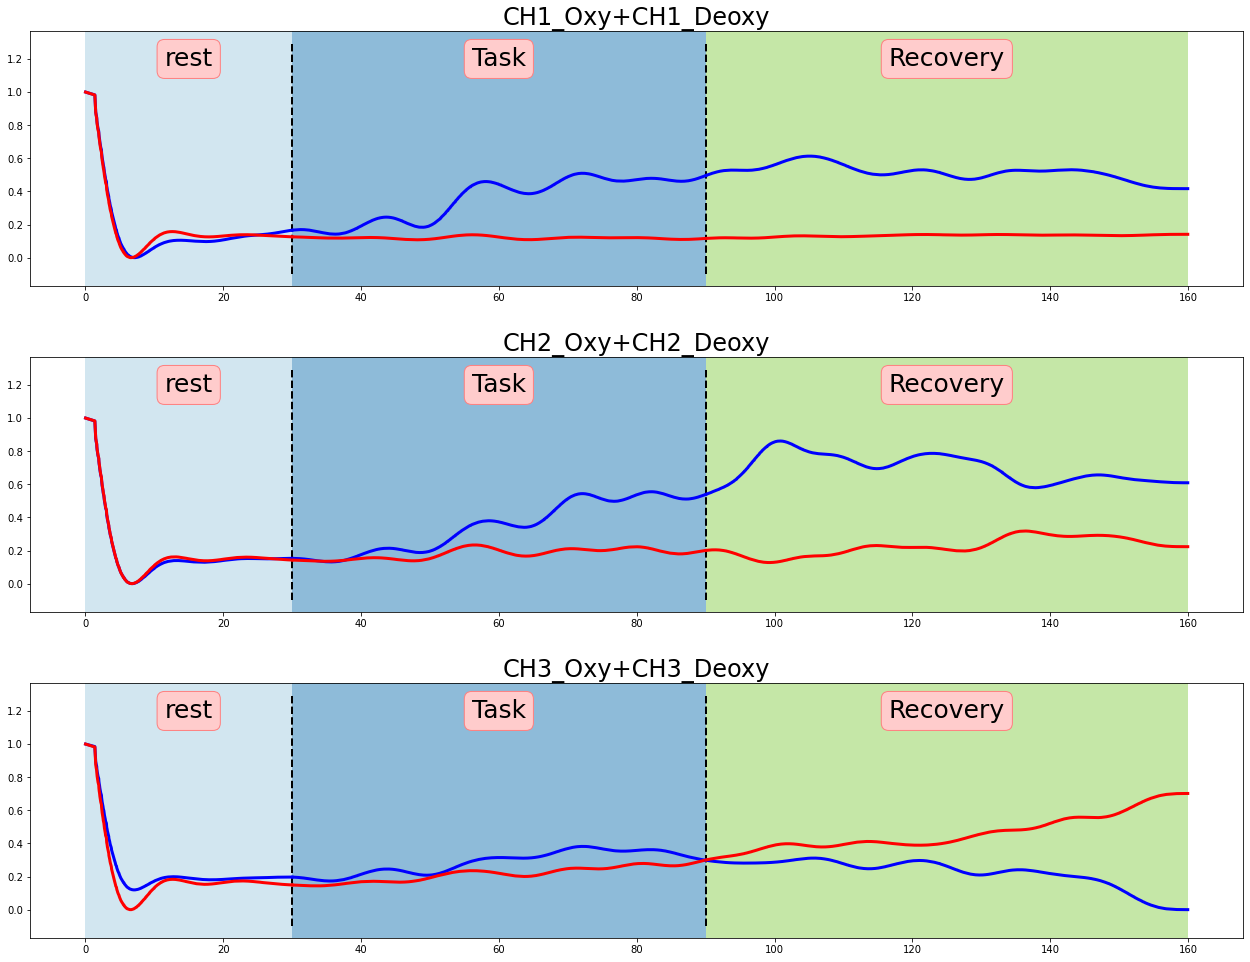

In [7]:
# 畫圖確認
stage1 = 30
stage2 = 90
stage3 = 160
text_size = 25

plt.figure(figsize= (18, 14))
for i in range(int(len(check_df.columns)/2)):
    plt.subplot(3, 1, i+1)

    # 第一階段
    plt.plot(check_df.loc[:stage1].index, check_df.loc[:stage1][cols[2*i]], c= 'b',  linewidth=3.0, label= 'Rest')
    plt.plot(check_df.loc[:stage1].index, check_df.loc[:stage1][cols[2*i+1]], c= 'r',  linewidth=3.0, label= 'Rest')
    plt.axvspan(0, stage1, facecolor=sns.color_palette('Paired')[0], alpha=0.5)
    plt.vlines(stage1, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
    plt.text(stage1/2, 1.2, "rest", size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

    # 第二階段
    plt.plot(check_df.loc[stage1:stage2].index, check_df.loc[stage1:stage2][cols[2*i]], c= 'b', linewidth=3.0, label= 'Task')
    plt.plot(check_df.loc[stage1:stage2].index, check_df.loc[stage1:stage2][cols[2*i+1]], c= 'r', linewidth=3.0, label= 'Task')
    plt.axvspan(stage1, stage2, facecolor=sns.color_palette('Paired')[1], alpha=0.5)
    plt.vlines(stage2, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
    plt.text((stage2 + stage1)/2, 1.2, 'Task', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

    # 第三階段
    plt.plot(check_df.loc[stage2:stage3].index, check_df.loc[stage2:stage3][cols[2*i]], c= 'b', linewidth=3.0, label= 'Recovery')
    plt.plot(check_df.loc[stage2:stage3].index, check_df.loc[stage2:stage3][cols[2*i+1]], c= 'r', linewidth=3.0, label= 'Recovery')
    plt.axvspan(stage2, stage3, facecolor=sns.color_palette('Paired')[2], alpha=0.75)
    plt.text((stage3 + stage2)/2, 1.2, 'Recovery', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

    plt.title(cols[2*i] + "+" + cols[2*i+1], fontdict={'fontsize': 24})
    plt.tight_layout(pad= 3)
plt.show()

#  濾波請用for

> 一定要用for，不然是文組
>
> 用 for i in range(len(AA)) 還好，但若是後面沒用到`**位置**`資訊，都是 AA[i]，那不是文組，但你寫的是C
>
> Python 的 for 是神
>
> for str 可以出字母，for list 可以出元素，for model 可以出layer，還有好用的list comprehension `[x**3 for i in range(10) if x%2 == 0]`

# Feature Extraction (From Lowpass filter)


### 清彥

1. 階段起始斜率 (8s) $\checkmark$
    * Task
    * Recovery
>   
2. 階段平均的差     $\checkmark$
    * Task mean – Rest mean
    * Recovery mean – Rest mean
    * Task mean – Recovery mean 
     
>
3. 階段峰值     $\checkmark$
    * Task

>
4. 階段標準差    $\checkmark$
    * 三個

>
### 品妤

>
5. 階段平均  $\checkmark$
    * 三個

>
6. 階段起始斜率 的差   $\checkmark$
    * Task - Recovery


### 我 
1. AUC


---
### 杰勳 bandpass
1. Stage skewness


2. Stage kurtosis

In [43]:
# 就重寫，沒意義
exam_df = pd.read_csv(all_csv[0], index_col= 'Unnamed: 0').drop(columns= ['Time_Arduino', 'easingdata'])
# print(exam_df.dtypes)

exam_df = exam_df.set_index('Time_Host')
exam_df.head()

,CH1_Oxy,CH1_Deoxy,CH2_Oxy,CH2_Deoxy,CH3_Oxy,CH3_Deoxy
Time_Host,,,,,,
1.314,0.296457,0.908762,0.205023,0.407071,0.150869,0.551817
1.335,0.296527,0.907390,0.208888,0.401577,0.152007,0.549613
1.355,0.296597,0.906050,0.212702,0.396101,0.153142,0.547398
1.375,0.296668,0.904743,0.216465,0.390644,0.154273,0.545173
1.395,0.296739,0.903470,0.220174,0.385209,0.155399,0.542939


##  階段起始斜率 2*6= 12

0. 定義 階段開始前"八秒"，單位 `?/S`

1. return list

2. 30~38  -> Task
    
3. 90~98 ->  Recovery


----

In [44]:
def stage_begin_slope(dataframe, plot= False, figsize= (10, 6), use_col= 0):
    #============================
    # Parameter: 
    #     dataframe:  input dataframe
    #     plot : whether to plot
    #     figsize: plt.figure(figsize= figsize)
    # Return:
    #     Tuple: 
    #         Tuple[0] : List of slope
    #         Tuple[1] : List of index
    #=======================

    slope_df = dataframe.loc[30:38]
    slope12 = []
    slope12_index = [col + "_Task_begin_slope" for col in  slope_df.columns]
    for i in range(len(slope_df.columns)):
        a = (slope_df.iloc[-1, i] - slope_df.iloc[0, i])/8  #八秒
        slope12.append(a)
    
    slope_df34 = dataframe.loc[90:98]
    slope34 = []
    slope34_index = [col + "_stage_Recovery_slope" for col in  slope_df34.columns]
    for i in range(len(slope_df.columns)):
        a = (slope_df34.iloc[-1, i] - slope_df34.iloc[0, i])/8  #八秒
        slope34.append(a)
    


    if plot == True:
        #-------plot
        plt.figure(figsize= figsize)

        stage1 = 30
        stage2 = 90
        stage3 = 160
        text_size = 25

        xp1 = np.arange(30, 38, 0.1)
        x1 = np.arange(0, 8, 0.1)
        y1 = x1*slope12[use_col] + slope_df.iloc[0, use_col]

        xp2 = np.arange(90, 98, 0.1)
        x2 = np.arange(0, 8, 0.1)
        y2 = x2*slope34[use_col] + slope_df34.iloc[0, use_col]
        
        plt.plot(dataframe.loc[:stage1].index, dataframe.loc[:stage1, dataframe.columns[use_col]], c= 'b',  linewidth=2.0, label= 'Rest')
        plt.axvspan(0, stage1, facecolor=sns.color_palette('Paired')[0], alpha=0.5)
        plt.vlines(stage1, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
        plt.vlines(stage1 + 8, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
        plt.text(stage1/2, 1.2, "rest", size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        # 第二階段
        plt.plot(dataframe.loc[stage1:stage2].index, dataframe.loc[stage1:stage2, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Task')
        plt.plot(xp1, y1, linewidth=5.0, c= 'r')
        plt.axvspan(stage1, stage2, facecolor=sns.color_palette('Paired')[1], alpha=0.5)
        plt.vlines(stage2, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
        plt.vlines(stage2 + 8, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
        plt.text((stage2 + stage1)/2, 1.2, 'Task', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        # 第三階段
        plt.plot(dataframe.loc[stage2:stage3].index, dataframe.loc[stage2:stage3, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Recovery')
        plt.plot(xp2, y2, linewidth=5.0, c= 'r')
        plt.axvspan(stage2, stage3, facecolor=sns.color_palette('Paired')[2], alpha=0.75)
        plt.text((stage3 + stage2)/2, 1.2, 'Recovery', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        plt.title(dataframe.columns[use_col] + "_stage_begin_slope", fontdict={'fontsize': 24})

        plt.show()


    return slope12 + slope34, slope12_index + slope34_index

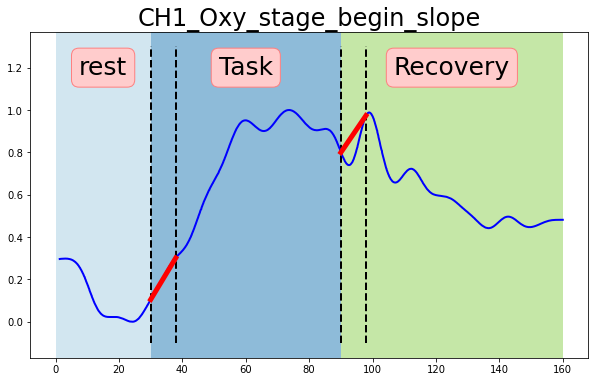

([0.024818954923087173,
  -0.013657397717200814,
  0.011554278443829464,
  -0.009824174797164624,
  0.012997805015956425,
  -0.020967673513835872,
  0.022014932342033097,
  -0.047617693117272604,
  0.05799203957554216,
  0.007034462043121872,
  0.050705565162720394,
  0.022175711730117825],
 ['CH1_Oxy_Task_begin_slope',
  'CH1_Deoxy_Task_begin_slope',
  'CH2_Oxy_Task_begin_slope',
  'CH2_Deoxy_Task_begin_slope',
  'CH3_Oxy_Task_begin_slope',
  'CH3_Deoxy_Task_begin_slope',
  'CH1_Oxy_stage_Recovery_slope',
  'CH1_Deoxy_stage_Recovery_slope',
  'CH2_Oxy_stage_Recovery_slope',
  'CH2_Deoxy_stage_Recovery_slope',
  'CH3_Oxy_stage_Recovery_slope',
  'CH3_Deoxy_stage_Recovery_slope'])

In [45]:
# 畫看看
stage_begin_slope(exam_df, plot= True)

### 畫全部　channel

In [46]:
# for i in range(6):
#     stage_begin_slope(exam_df, plot= True, use_col= i)

# 階段平均 3*6 = 18

1. 0~30 -> Rest
2. 30~90 -> Task
3. 90~ 160 -> Recovery

In [47]:
def stage_mean(dataframe, plot= False, figsize= (10, 6), use_col= 0):

    #============================
    # Parameter: 
    #     dataframe:  input dataframe
    #     plot : whether to plot
    #     figsize: plt.figure(figsize= figsize)
    # Return:
    #     Tuple: 
    #         Tuple[0] : List of mean
    #         Tuple[1] : List of index
    #=======================

    stage1 = 30
    stage2 = 90
    stage3 = 160

    Rest = []
    Task = []
    Recovery = []

    Rest_c = []
    Task_c = []
    Recovery_c = []

    for col in dataframe.columns:

        Rest.append(dataframe.loc[:stage1, col].mean())  #pandas 有 .mean() 可以用
        Rest_c.append(col + '_Rest_mean')

        Task.append(dataframe.loc[stage1:stage2, col].mean())
        Task_c.append(col + '_Task_mean')


        Recovery.append(dataframe.loc[stage2:stage3, col].mean())
        Recovery_c.append(col + '_Recovery_mean')



    if plot == True:
        #-------plot
        plt.figure(figsize= figsize)
        text_size = 25

        xp1 = np.arange(0, stage1, 0.1)
        y1 = np.full(xp1.shape, Rest[use_col])
        

        xp2 = np.arange(stage1, stage2, 0.1)
        y2 = np.full(xp2.shape, Task[use_col])

        xp3 = np.arange(stage2, stage3, 0.1)
        y3 = np.full(xp3.shape, Recovery[use_col])
        
        plt.plot(dataframe.loc[:stage1].index, dataframe.loc[:stage1, dataframe.columns[use_col]], c= 'b',  linewidth=2.0, label= 'Rest')
        plt.plot(xp1, y1, linewidth=5.0, c= 'r')
        plt.axvspan(0, stage1, facecolor=sns.color_palette('Paired')[0], alpha=0.5)
        plt.vlines(stage1, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
        plt.text(stage1/2, 1.2, "rest", size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        # 第二階段
        plt.plot(dataframe.loc[stage1:stage2].index, dataframe.loc[stage1:stage2, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Task')
        
        plt.plot(xp2, y2, linewidth=5.0, c= 'r')
        plt.axvspan(stage1, stage2, facecolor=sns.color_palette('Paired')[1], alpha=0.5)
        plt.vlines(stage2, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
        plt.text((stage2 + stage1)/2, 1.2, 'Task', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        # 第三階段
        plt.plot(xp3, y3, linewidth=5.0, c= 'r')
        plt.plot(dataframe.loc[stage2:stage3].index, dataframe.loc[stage2:stage3, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Recovery')
        
        plt.axvspan(stage2, stage3, facecolor=sns.color_palette('Paired')[2], alpha=0.75)
        plt.text((stage3 + stage2)/2, 1.2, 'Recovery', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        plt.title(dataframe.columns[use_col] + "_stage_mean", fontdict={'fontsize': 24})

        plt.show()

    return Rest + Task + Recovery, Rest_c + Task_c + Recovery_c


### 畫全部 channel

In [48]:
# for i in range(6):
#     stage_mean(exam_df, plot= True, use_col=i)

# 階段平均的差  -> 2*6 = 12
    * Task mean – Rest mean
    * Task mean – Recovery mean 

# 活化值 -> 1*6
    * Recovery mean – Rest mean

In [49]:
def stage_mean_diff(dataframe, plot= False, figsize= (10, 6), use_col= 0):

    #============================
    # Parameter: 
    #     dataframe:  input dataframe
    #     plot : whether to plot
    #     figsize: plt.figure(figsize= figsize)
    # Return:
    #     Tuple: 
    #         Tuple[0] : List of mean diff or activation
    #         Tuple[1] : List of index
    #=======================

    stage1 = 30
    stage2 = 90
    stage3 = 160

    Task_Rest = []
    Recovery_Rest = []
    Task_recovery = []
    

    Task_Rest_c = []
    Recovery_Rest_c = []
    Task_recovery_c = []

    for col in dataframe.columns:
        # 階段平均差
        Task_Rest.append(dataframe.loc[stage1:stage2, col].mean() - dataframe.loc[:stage1, col].mean())
        Task_Rest_c.append(col + '_Task_m_Rest')

        Task_recovery.append(dataframe.loc[stage1:stage2, col].mean() - dataframe.loc[stage2:stage3, col].mean())
        Task_recovery_c.append(col + '_Task_m_Recovery')

        # 活化值
        Recovery_Rest.append(dataframe.loc[stage2:stage3, col].mean() - dataframe.loc[:stage1, col].mean())
        Recovery_Rest_c.append(col + '_Recovery_Rest_Activation')



    if plot == True:

        import matplotlib.patches as patches

        Rest = []
        Task = []
        Recovery = []

        Rest_c = []
        Task_c = []
        Recovery_c = []

        for col in dataframe.columns:

            Rest.append(dataframe.loc[:stage1, col].mean())
            Rest_c.append(col + '_Rest_mean')

            Task.append(dataframe.loc[stage1:stage2, col].mean())
            Task_c.append(col + '_Task_mean')


            Recovery.append(dataframe.loc[stage2:stage3, col].mean())
            Recovery_c.append(col + '_Recovery_mean')

        #-------plot
        plt.figure(figsize= figsize)
        text_size = 25

        xp1 = np.arange(0, stage1, 0.1)
        y1 = np.full(xp1.shape, Rest[use_col])
        

        xp2 = np.arange(stage1, stage2, 0.1)
        y2 = np.full(xp2.shape, Task[use_col])

        xp3 = np.arange(stage2, stage3, 0.1)
        y3 = np.full(xp3.shape, Recovery[use_col])
        
        plt.plot(dataframe.loc[:stage1].index, dataframe.loc[:stage1, dataframe.columns[use_col]], c= 'b',  linewidth=2.0, label= 'Rest')
        plt.plot(xp1, y1, linewidth=3.0, c= 'r')
        plt.axvspan(0, stage1, facecolor=sns.color_palette('Paired')[0], alpha=0.5)
        plt.vlines(stage1, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=1.0)
        plt.text(stage1/2, 1.2, "rest", size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        # 第二階段
        plt.plot(dataframe.loc[stage1:stage2].index, dataframe.loc[stage1:stage2, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Task')
        plt.plot(xp2, y2, linewidth=3.0, c= 'r')

        plt.annotate(s='', xy=(stage1 + 2, Task[use_col] - 0.03), xytext=(stage1 + 2, Rest[use_col] +0.03), arrowprops=dict(arrowstyle='<->', mutation_scale=10, color= 'k', linewidth= 5))

        plt.axvspan(stage1, stage2, facecolor=sns.color_palette('Paired')[1], alpha=0.5)
        plt.vlines(stage2, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=1.0)
        plt.text((stage2 + stage1)/2, 1.2, 'Task', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        # 第三階段
        plt.plot(xp3, y3, linewidth=3.0, c= 'r')
        plt.plot(dataframe.loc[stage2:stage3].index, dataframe.loc[stage2:stage3, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Recovery')
        
        plt.annotate(s='', xy=(stage2 + 2, Recovery[use_col] - 0.03), xytext=(stage2 + 2, Task[use_col] +0.03),arrowprops=dict(arrowstyle='<->', mutation_scale=10, color= 'k', linewidth= 5))
        
        plt.axvspan(stage2, stage3, facecolor=sns.color_palette('Paired')[2], alpha=0.75)
        plt.text((stage3 + stage2)/2, 1.2, 'Recovery', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        plt.title(dataframe.columns[use_col] + "_stage_mean_diff", fontdict={'fontsize': 24})

        plt.show()
        
    
    return Task_Rest + Recovery_Rest + Task_recovery, Task_Rest_c + Recovery_Rest_c + Task_recovery_c

### 畫畫看 channel

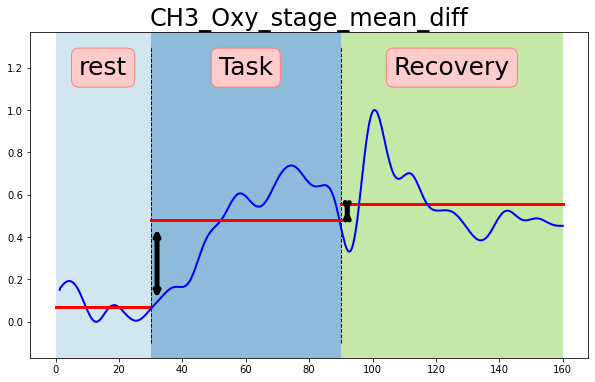

([0.61143673309657,
  -0.260088797199154,
  0.3021119868296245,
  -0.06976403889761743,
  0.40672152759861585,
  -0.25819026031529235,
  0.4943583631180011,
  -0.440965704763312,
  0.5361435416911875,
  0.3796929853918445,
  0.48475394764624635,
  0.1676683299368104,
  0.11707836997856891,
  0.18087690756415797,
  -0.23403155486156307,
  -0.44945702428946194,
  -0.0780324200476305,
  -0.42585859025210276],
 ['CH1_Oxy_Task_m_Rest',
  'CH1_Deoxy_Task_m_Rest',
  'CH2_Oxy_Task_m_Rest',
  'CH2_Deoxy_Task_m_Rest',
  'CH3_Oxy_Task_m_Rest',
  'CH3_Deoxy_Task_m_Rest',
  'CH1_Oxy_Recovery_Rest_Activation',
  'CH1_Deoxy_Recovery_Rest_Activation',
  'CH2_Oxy_Recovery_Rest_Activation',
  'CH2_Deoxy_Recovery_Rest_Activation',
  'CH3_Oxy_Recovery_Rest_Activation',
  'CH3_Deoxy_Recovery_Rest_Activation',
  'CH1_Oxy_Task_m_Recovery',
  'CH1_Deoxy_Task_m_Recovery',
  'CH2_Oxy_Task_m_Recovery',
  'CH2_Deoxy_Task_m_Recovery',
  'CH3_Oxy_Task_m_Recovery',
  'CH3_Deoxy_Task_m_Recovery'])

In [50]:
stage_mean_diff(exam_df, plot= True, use_col= 4)

# 階段峰值 1*6 = 6
    * Task


In [51]:
def stage_acivation(dataframe, plot= False, figsize= (10, 6), use_col= 0):

    #============================
    # Parameter: 
    #     dataframe:  input dataframe
    #     plot : whether to plot
    #     figsize: plt.figure(figsize= figsize)
    # Return:
    #     Tuple: 
    #         Tuple[0] : List of 峰值
    #         Tuple[1] : List of index
    #=======================

    stage1 = 30
    stage2 = 90
    stage3 = 160

    diffs = []
    diffs_name = []

    for cols in dataframe.columns:

        diff = dataframe.loc[stage1:stage2, cols].max() - dataframe.loc[stage1:stage2, cols].min()
        diffs.append(diff)
        diffs_name.append(cols + "_stage_activation")


    if plot == True:
        #-------plot
        plt.figure(figsize= figsize)
        text_size = 25


        
        plt.plot(dataframe.loc[:stage1].index, dataframe.loc[:stage1, dataframe.columns[use_col]], c= 'b',  linewidth=2.0, label= 'Rest')
        plt.axvspan(0, stage1, facecolor=sns.color_palette('Paired')[0], alpha=0.5)
        plt.vlines(stage1, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
        plt.text(stage1/2, 1.2, "rest", size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        # 第二階段
        plt.plot(dataframe.loc[stage1:stage2].index, dataframe.loc[stage1:stage2, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Task')
        plt.axvspan(stage1, stage2, facecolor=sns.color_palette('Paired')[1], alpha=0.5)
        plt.vlines(stage2, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)

        plt.hlines(dataframe.loc[stage1:stage2, dataframe.columns[use_col]].min(), stage1, stage2, linestyles= '-', colors= 'black',  linewidth=5.0)
        plt.hlines(dataframe.loc[stage1:stage2, dataframe.columns[use_col]].max(), stage1, stage2, linestyles= '-', colors= 'black',  linewidth=5.0)
        plt.annotate(s='', xy=( (stage1 + stage2)/2, dataframe[dataframe.columns[use_col]].loc[stage1:stage2].min()), xytext=( (stage1 + stage2)/2, dataframe[dataframe.columns[use_col]].loc[stage1:stage2].max()),arrowprops=dict(arrowstyle='<->', mutation_scale=10, color= 'k', linewidth= 5))

        plt.text((stage2 + stage1)/2, 1.2, 'Task', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        # 第三階段
        plt.plot(dataframe.loc[stage2:stage3].index, dataframe.loc[stage2:stage3, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Recovery')
        
        plt.axvspan(stage2, stage3, facecolor=sns.color_palette('Paired')[2], alpha=0.75)
        plt.text((stage3 + stage2)/2, 1.2, 'Recovery', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        plt.title(dataframe.columns[use_col] + "_stage_acivation", fontdict={'fontsize': 24})

        plt.show()

    return diffs, diffs_name
    

### 畫全部 channel

In [54]:
# for i in range(6):
#     stage_acivation(exam_df, plot= True, use_col= i)

# 階段標準差
    * 三個


### 標準差不能歸一化  

In [55]:
def stage_std(dataframe, plot= False, figsize= (10, 6), use_col= 0):

    #============================
    # Parameter: 
    #     dataframe:  input dataframe
    #     plot : whether to plot
    #     figsize: plt.figure(figsize= figsize)
    # Return:
    #     Tuple: 
    #         Tuple[0] : List of std
    #         Tuple[1] : List of index
    #=======================

    
    stage1 = 30
    stage2 = 90
    stage3 = 160

    Rest_std = []
    Task_std = []
    Recovery_std = []

    Rest_std_c = []
    Task_std_c = []
    Recovery_std_c = []

    for col in dataframe.columns:

        Rest_std.append(dataframe.loc[:stage1, col].std())  # 簡單方便 .std
        Rest_std_c.append(col + '_Rest_std')

        Task_std.append(dataframe.loc[stage1:stage2, col].std())
        Task_std_c.append(col + '_Task_std')


        Recovery_std.append(dataframe.loc[stage2:stage3, col].std())
        Recovery_std_c.append(col + '_Recovery_std')



    if plot == True:


        Rest = []
        Task = []
        Recovery = []

        Rest_c = []
        Task_c = []
        Recovery_c = []

        for col in dataframe.columns:

            Rest.append(dataframe.loc[:stage1, col].mean())
            Rest_c.append(col + '_Rest_mean')

            Task.append(dataframe.loc[stage1:stage2, col].mean())
            Task_c.append(col + '_Task_mean')


            Recovery.append(dataframe.loc[stage2:stage3, col].mean())
            Recovery_c.append(col + '_Recovery_mean')
        #-------plot
        plt.figure(figsize= figsize)
        text_size = 25

        xp1 = np.arange(0, stage1, 0.1)
        y1 = np.full(xp1.shape, Rest[use_col])
        

        xp2 = np.arange(stage1, stage2, 0.1)
        y2 = np.full(xp2.shape, Task[use_col])

        xp3 = np.arange(stage2, stage3, 0.1)
        y3 = np.full(xp3.shape, Recovery[use_col])
        
        plt.plot(dataframe.loc[:stage1].index, dataframe.loc[:stage1, dataframe.columns[use_col]], c= 'b',  linewidth=2.0, label= 'Rest')
        plt.plot(xp1, y1, linewidth=5.0, c= 'r')

        plt.errorbar((stage1)/2, Rest[use_col], Rest_std[use_col], linestyle='-', marker='^', elinewidth= 3, ecolor= 'k', capsize= 10)

        plt.axvspan(0, stage1, facecolor=sns.color_palette('Paired')[0], alpha=0.5)
        plt.vlines(stage1, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
        plt.text(stage1/2, 1.2, "rest", size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        # 第二階段
        plt.plot(dataframe.loc[stage1:stage2].index, dataframe.loc[stage1:stage2, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Task')
        plt.plot(xp2, y2, linewidth=5.0, c= 'r')

        plt.errorbar((stage1 + stage2)/2, Task[use_col], Task_std[use_col], linestyle='-', marker='^', elinewidth= 3, ecolor= 'k', capsize= 10)
        plt.axvspan(stage1, stage2, facecolor=sns.color_palette('Paired')[1], alpha=0.5)
        plt.vlines(stage2, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
        plt.text((stage2 + stage1)/2, 1.2, 'Task', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        # 第三階段
        plt.plot(xp3, y3, linewidth=5.0, c= 'r')
        plt.plot(dataframe.loc[stage2:stage3].index, dataframe.loc[stage2:stage3, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Recovery')
        
        plt.errorbar((stage3 + stage2)/2, Recovery[use_col], Recovery_std[use_col], linestyle='-', marker='^', elinewidth= 3, ecolor= 'k', capsize= 10)
        plt.axvspan(stage2, stage3, facecolor=sns.color_palette('Paired')[2], alpha=0.75)
        plt.text((stage3 + stage2)/2, 1.2, 'Recovery', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

        plt.title(dataframe.columns[use_col] + "_stage_std", fontdict={'fontsize': 24})

        plt.show()

    return Rest_std + Task_std + Recovery_std, Rest_std_c + Task_std_c + Recovery_std_c

### 畫全部 channel

In [56]:
# for i in range(6):
#     stage_std(exam_df, plot= True, use_col= i)

# 階段起始斜率 的差
    * Task - Recovery

In [57]:
def stage_begin_slope_diff(dataframe):

    #============================
    # Parameter: 
    #     dataframe:  input dataframe
    #     plot : whether to plot
    #     figsize: plt.figure(figsize= figsize)
    # Return:
    #     Tuple: 
    #         Tuple[0] : List of slope diff
    #         Tuple[1] : List of index
    #=======================

    slope_df = dataframe.loc[30:38]
    slope12 = []
    for i in range(len(slope_df.columns)):
        a = (slope_df.iloc[-1, i] - slope_df.iloc[0, i])/8  #八秒
        slope12.append(a)
    
    slope_df34 = dataframe.loc[90:98]
    slope34 = []
    for i in range(len(slope_df.columns)):
        a = (slope_df34.iloc[-1, i] - slope_df34.iloc[0, i])/8  #八秒
        slope34.append(a)


    colset = []
    for col in dataframe.columns:
        colset.append(col + "_Task_Recovery_begin_slope_diff")

    slope_diff = np.array(slope12) - np.array(slope34)

    return list(slope_diff), colset
    

In [59]:
stage_begin_slope_diff(exam_df)

([0.002804022581054076,
  0.03396029540007179,
  -0.04643776113171269,
  -0.016858636840286496,
  -0.03770776014676397,
  -0.0431433852439537],
 ['CH1_Oxy_Task_Recovery_begin_slope_diff',
  'CH1_Deoxy_Task_Recovery_begin_slope_diff',
  'CH2_Oxy_Task_Recovery_begin_slope_diff',
  'CH2_Deoxy_Task_Recovery_begin_slope_diff',
  'CH3_Oxy_Task_Recovery_begin_slope_diff',
  'CH3_Deoxy_Task_Recovery_begin_slope_diff'])

# Stage skewness  -> use scipy
        * 三個階段

> 資料分布靠左"正"
>
> 資料分布靠右"負"


### [好用圖中圖](https://www.itread01.com/p/518289.html)

In [60]:
def stage_skew(dataframe, plot= False, figsize= (10, 6), use_col= 0):
    from scipy.stats import skew

    #============================
    # Parameter: 
    #     dataframe:  input dataframe
    #     plot : whether to plot
    #     figsize: plt.figure(figsize= figsize)
    # Return:
    #     Tuple: 
    #         Tuple[0] : List of skew
    #         Tuple[1] : List of index
    #=======================

    stage1 = 30
    stage2 = 90
    stage3 = 160
    text_size = 25

    rest_skew = []
    task_skew = []
    recovery_skew = []

    rest_skew_c = []
    task_skew_c = []
    recovery_skew_c = []

    for cols in dataframe.columns:

        rest_skew.append(skew(dataframe.loc[:stage1, cols]))
        rest_skew_c.append(cols + '_rest_skew')

        task_skew.append(skew(dataframe.loc[stage1:stage2, cols]))
        task_skew_c.append(cols + '_task_skew')

        recovery_skew.append(skew(dataframe.loc[stage2:stage3, cols]))
        recovery_skew_c.append(cols + '_recovery_skew')

    if plot == True:
            #-------plot
            plt.figure(figsize= figsize)
            
            plt.plot(dataframe.loc[:stage1].index, dataframe.loc[:stage1, dataframe.columns[use_col]], c= 'b',  linewidth=2.0, label= 'Rest')
            plt.axvspan(0, stage1, facecolor=sns.color_palette('Paired')[0], alpha=0.5)
            plt.vlines(stage1, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
            plt.text(stage1/2, 1.2, "rest", size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

            # 第二階段
            plt.plot(dataframe.loc[stage1:stage2].index, dataframe.loc[stage1:stage2, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Task')
            plt.axvspan(stage1, stage2, facecolor=sns.color_palette('Paired')[1], alpha=0.5)
            
            
            
            plt.vlines(stage2, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
            plt.text((stage2 + stage1)/2, 1.2, 'Task', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

            # 第三階段
            plt.plot(dataframe.loc[stage2:stage3].index, dataframe.loc[stage2:stage3, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Recovery')
            plt.axvspan(stage2, stage3, facecolor=sns.color_palette('Paired')[2], alpha=0.75)
            plt.text((stage3 + stage2)/2, 1.2, 'Recovery', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))
            
            plt.title(dataframe.columns[use_col] + "_stage_skew", fontdict={'fontsize': 24})

            plt.axes([0.65, 0.2, 0.2, 0.2])
            sns.histplot(dataframe.loc[stage1:stage2, dataframe.columns[use_col]], bins= 30)
            plt.title("Task skew", fontdict={'fontsize': 13})


            

            plt.show()


    return rest_skew + task_skew + recovery_skew, rest_skew_c + task_skew_c + recovery_skew_c


### 畫全部 channel

In [62]:
# for i in range(6):
#     a = stage_skew(exam_df, plot= True, use_col= i)

# Stage kurtosis 峰度(尖度)

        * 三個

In [63]:
def stage_kurtosis(dataframe):

    from scipy.stats import kurtosis

    #============================
    # Parameter: 
    #     dataframe:  input dataframe
    #     plot : whether to plot
    #     figsize: plt.figure(figsize= figsize)
    # Return:
    #     Tuple: 
    #         Tuple[0] : List of kurtosis
    #         Tuple[1] : List of index
    #=======================

    stage1 = 30
    stage2 = 90
    stage3 = 160
    text_size = 25

    rest_skew = []
    task_skew = []
    recovery_skew = []

    rest_skew_c = []
    task_skew_c = []
    recovery_skew_c = []

    for cols in dataframe.columns:

        rest_skew.append(kurtosis(dataframe.loc[:stage1, cols]))
        rest_skew_c.append(cols + '_rest_kurtosis')

        task_skew.append(kurtosis(dataframe.loc[stage1:stage2, cols]))
        task_skew_c.append(cols + '_task_kurtosis')

        recovery_skew.append(kurtosis(dataframe.loc[stage2:stage3, cols]))
        recovery_skew_c.append(cols + '_recovery_kurtosis')

    return rest_skew + task_skew + recovery_skew, rest_skew_c + task_skew_c + recovery_skew_c


In [64]:
stage_kurtosis(dataframe= exam_df)

([-1.2685309668102003,
  -1.0451578509302635,
  -0.6710544135837528,
  2.0883365318603584,
  -0.8303251149917559,
  5.071123460793302,
  -0.7559405448193788,
  0.18123122576072337,
  -1.1041094204581288,
  -1.0605821067585914,
  -0.9834725135999838,
  2.558699008619196,
  -0.21698689321954578,
  -0.6279308517311244,
  1.4973757443580853,
  -1.204220190139248,
  0.9104134208784167,
  -1.3078361292447447],
 ['CH1_Oxy_rest_kurtosis',
  'CH1_Deoxy_rest_kurtosis',
  'CH2_Oxy_rest_kurtosis',
  'CH2_Deoxy_rest_kurtosis',
  'CH3_Oxy_rest_kurtosis',
  'CH3_Deoxy_rest_kurtosis',
  'CH1_Oxy_task_kurtosis',
  'CH1_Deoxy_task_kurtosis',
  'CH2_Oxy_task_kurtosis',
  'CH2_Deoxy_task_kurtosis',
  'CH3_Oxy_task_kurtosis',
  'CH3_Deoxy_task_kurtosis',
  'CH1_Oxy_recovery_kurtosis',
  'CH1_Deoxy_recovery_kurtosis',
  'CH2_Oxy_recovery_kurtosis',
  'CH2_Deoxy_recovery_kurtosis',
  'CH3_Oxy_recovery_kurtosis',
  'CH3_Deoxy_recovery_kurtosis'])

# AUC  -> use sklearn
    * 三個

1. 看了很多，好比說scipy.integrate, numpy.trap
2. 還是 sklearn的好用，(這邊其他的也可以試試不強制)

In [65]:
def stage_auc(dataframe, plot= False, figsize= (10, 6), use_col= 0):
    from sklearn.metrics import auc

    #============================
    # Parameter: 
    #     dataframe:  input dataframe
    #     plot : whether to plot
    #     figsize: plt.figure(figsize= figsize)
    # Return:
    #     Tuple: 
    #         Tuple[0] : List of auc
    #         Tuple[1] : List of index
    #=======================

    stage1 = 30
    stage2 = 90
    stage3 = 160

    rest_auc = []
    Task_auc = []
    recovery_auc = []

    rest_auc_c = []
    Task_auc_c = []
    recovery_auc_c = []

    for cols in dataframe.columns:    
        rest_auc.append(auc(dataframe.loc[:stage1, cols].index, dataframe.loc[:stage1, cols]))
        rest_auc_c.append(cols + '_rest_auc')

        Task_auc.append(auc(dataframe.loc[stage1:stage2, cols].index, dataframe.loc[stage1:stage2, cols]))
        Task_auc_c.append(cols + '_Task_auc')

        recovery_auc.append(auc(dataframe.loc[stage2:stage3, cols].index, dataframe.loc[stage2:stage3, cols]))
        recovery_auc_c.append(cols + '_recovery_auc')

    if plot == True:
            #-------plot
            plt.figure(figsize= figsize)
            
            plt.plot(dataframe.loc[:stage1].index, dataframe.loc[:stage1, dataframe.columns[use_col]], c= 'b',  linewidth=2.0, label= 'Rest')
            
            yy1 = dataframe.loc[0:stage1, dataframe.columns[use_col]]
            plt.fill_between(np.linspace(0, stage1, yy1.shape[0]), yy1, step="pre", facecolor=sns.color_palette('Paired')[0], y2=-0.1)
            plt.vlines(stage1, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
            plt.text(stage1/2, 1.2, "rest", size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

            # 第二階段
            plt.plot(dataframe.loc[stage1:stage2].index, dataframe.loc[stage1:stage2, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Task')
            yy2 = dataframe.loc[stage1:stage2, dataframe.columns[use_col]]
            plt.fill_between(np.linspace(stage1, stage2, yy2.shape[0]), yy2, step="pre", facecolor=sns.color_palette('Paired')[1], y2=-0.1)
            
            plt.vlines(stage2, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
            plt.text((stage2 + stage1)/2, 1.2, 'Task', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

            # 第三階段
            plt.plot(dataframe.loc[stage2:stage3].index, dataframe.loc[stage2:stage3, dataframe.columns[use_col]], c= 'b', linewidth=2.0, label= 'Recovery')
            # plt.axvspan(stage2, stage3, facecolor=sns.color_palette('Paired')[2], alpha=0.75)
            plt.text((stage3 + stage2)/2, 1.2, 'Recovery', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))
            
            yy3 = dataframe.loc[stage2:stage3, dataframe.columns[use_col]]
            plt.fill_between(np.linspace(stage2, stage3, yy3.shape[0]), yy3, step="pre", facecolor=sns.color_palette('Paired')[2], y2=-0.1)

            plt.title(dataframe.columns[use_col] + "_stage_auc", fontdict={'fontsize': 24})

            plt.show()


    return rest_auc + Task_auc + recovery_auc, rest_auc_c + Task_auc_c + recovery_auc_c
    

### 畫全部 channel

In [68]:
# for i in range(6):
#     stage_auc(exam_df, plot=True, use_col= i)

# FFT

1. 取樣頻率要是頻率的兩倍

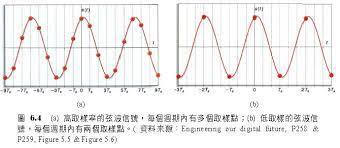

# 待釐清

1. 要取 "全部"、"還是三階段**各自**的"、"還是Task就好的" fft
    > 目前是想說，既然訊號是連續三個階段一次做完的，生理訊號的頻率應該也會持續，所以取三個階段各自的沒意義，一次去取全部較好

2. 平方 -> 是一個叫做 PSD 的東西
`fft_ps = np.abs(fft_window)**2`

###  > referance

[1. ML Fundamentals](https://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/) -> use scipy

[2. stackoverflow](https://stackoverflow.com/questions/45863400/python-fft-for-feature-extraction)  -> use numpy


#  以 全時域(0~160s) 資料下去做 fft

In [69]:
# 第一行
y = exam_df.iloc[:, 0].values

#### stack overflow　-> numpy

In [70]:
# stack overflow
import numpy as np

sample_rate = 24
N = np.array(y).shape[-1]

# 從 0 ~ 12Hz 取 N/個
fft_window = np.fft.fft(y)
freq  = np.fft.fftfreq(N, d=1/24)

# 為啥要平方??
fft_ps = np.abs(fft_window)**2

In [71]:
fft_window.shape, freq.shape, freq.max(), freq.min()

((2891,), (2891,), 11.99584918713248, -11.99584918713248)

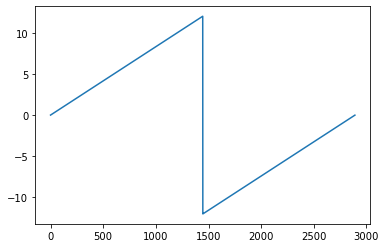

In [72]:
plt.plot(freq)

## 0.12Hz (cut down frequency)之後decay很快，看起來合理

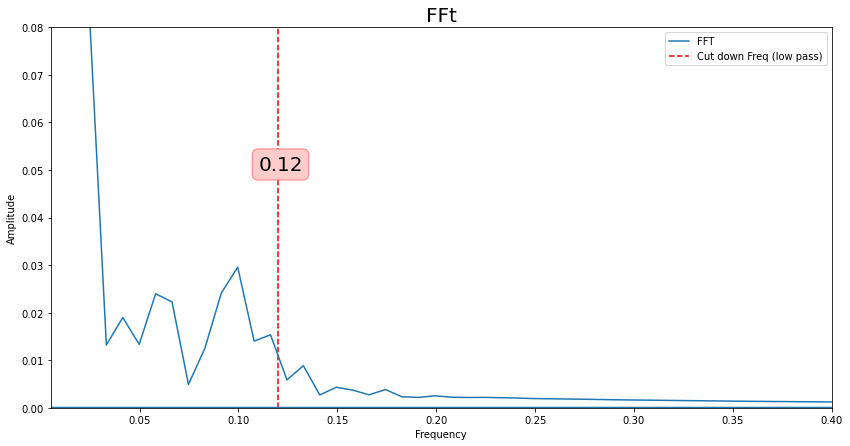

In [73]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 7))


plt.plot(freq, 2.0/N *np.abs(fft_window), label= 'FFT')
# plt.plot(freq, np.log10(fft_ps))
plt.ylim(0, 0.08)
plt.xlim(0.005, 0.4)
plt.vlines(0.12, 0, 100, colors= 'r', linestyles= '--', label= 'Cut down Freq (low pass)', )
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.annotate("0.12", (0.110, 0.05), fontsize= 20, bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
plt.title('FFt', fontsize= 20)
plt.legend()
plt.show()

#### ML Fundamentals -> scipy

In [74]:
from scipy.fft import fft

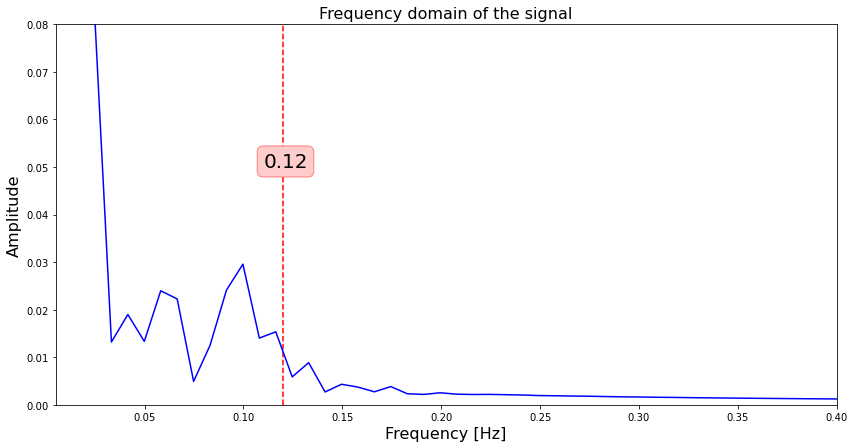

In [75]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)

    # 歸一化嗎??
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
f_s = 24
T = 1/f_s
N = np.array(y).shape[-1]
 
f_values, fft_values = get_fft_values(y, T, N, f_s)
 
plt.figure(figsize= (14, 7))
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.vlines(0.12, 0, 0.085, colors= 'r', linestyles= '--', label= 'Cut down Freq (low pass)', )
plt.annotate("0.12", (0.110, 0.05), fontsize= 20, bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
plt.ylim(0, 0.08)
plt.xlim(0.005, 0.4)
plt.show()

# 找峰值  -> scipy 

> 下面網站有很多方法

[1. 好用網站](https://www.delftstack.com/zh-tw/howto/python/find-peaks-in-python/)

In [76]:
import numpy as np
from scipy.signal import argrelextrema

peaks = argrelextrema(fft_values, np.greater)
print(peaks)

(array([ 5,  7, 12, 14, 16, 18, 21, 24, 27], dtype=int64),)


In [77]:
f_values[5], fft_values[5]

for ind in peaks[0]:
    print(f_values[ind], fft_values[ind])

peaks[0]

0.04155124653739613 0.018987577734909184
0.05817174515235457 0.02397264138412049
0.0997229916897507 0.029568646094166144
0.11634349030470914 0.015344380096557166
0.1329639889196676 0.00885660258367288
0.14958448753462605 0.004318247202516568
0.1745152354570637 0.0038312471787040753
0.1994459833795014 0.002523022373123932
0.22437673130193908 0.0021880557234638105


array([ 5,  7, 12, 14, 16, 18, 21, 24, 27], dtype=int64)

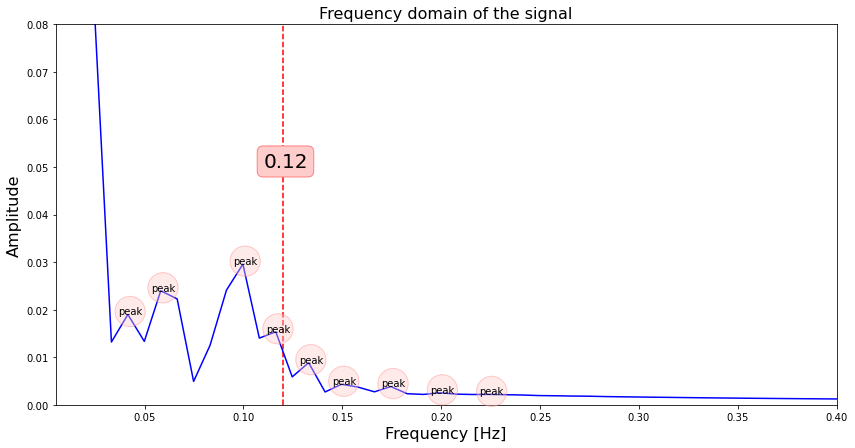

In [78]:
plt.figure(figsize= (14, 7))
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.vlines(0.12, 0, 0.085, colors= 'r', linestyles= '--', label= 'Cut down Freq (low pass)', )
plt.annotate("0.12", (0.110, 0.05), fontsize= 20, bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))

for ind in peaks[0]:
    plt.annotate("peak", (f_values[ind]-0.005, fft_values[ind]), bbox=dict(boxstyle="Circle", alpha= 0.4, ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))


plt.ylim(0, 0.08)
plt.xlim(0.005, 0.4)
plt.show()

In [79]:
# 留0.12 以下 ?

save_index = [x for x in peaks[0] if f_values[x] <= 0.12]
print(save_index)

# 直接找前3名

# np.argsort ??
use_ind = np.argsort(fft_values[peaks[0]])[-3:][::-1]
real_ind = peaks[0][use_ind]
real_ind

whole = list(zip(f_values[real_ind], fft_values[real_ind]))
whole

[5, 7, 12, 14]


[(0.0997229916897507, 0.029568646094166144),
 (0.05817174515235457, 0.02397264138412049),
 (0.04155124653739613, 0.018987577734909184)]

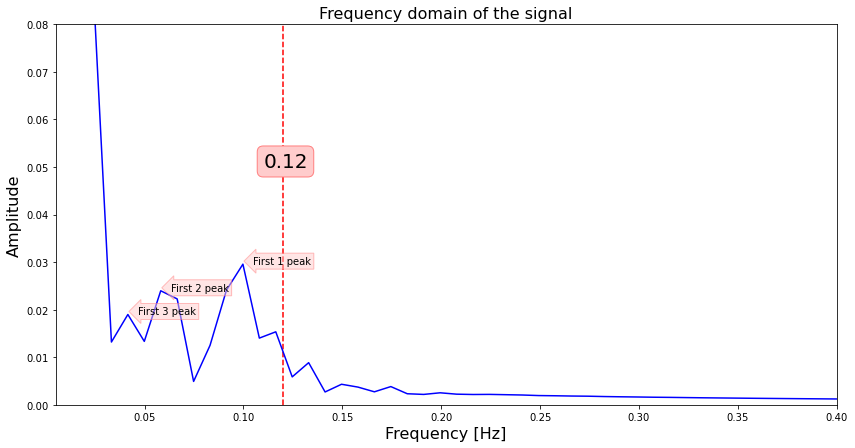

In [80]:
plt.figure(figsize= (14, 7))
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.vlines(0.12, 0, 0.085, colors= 'r', linestyles= '--', label= 'Cut down Freq (low pass)', )
plt.annotate("0.12", (0.110, 0.05), fontsize= 20, bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))

for i, val in enumerate(whole):
    plt.annotate(f"First {i+1} peak", (val[0]+0.005, val[1]),size=10, bbox=dict(boxstyle="LArrow", alpha= 0.5, ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))


plt.ylim(0, 0.08)
plt.xlim(0.005, 0.4)
plt.show()

# FFT
    * 一張圖 3 個峰值，共有六種血氧(3channel * 含氧/缺氧)
    * 一個峰值會有兩數值，一個是 amp，一個是 峰值的頻率


In [81]:
def FFT(dataframe, f_s = 24, plot= False):
    from scipy.fft import fft
    import numpy as np
    from scipy.signal import argrelextrema

    #============================
    # Parameter: 
    #     dataframe:  input dataframe
    #     plot : whether to plot
    #     figsize: plt.figure(figsize= figsize)
    # Return:
    #     Tuple: 
    #         Tuple[0] : List of fft
    #         Tuple[1] : List of index
    #=======================

    save_fft = []
    save_fft_index = []
    # column 0 fft

    for colss in dataframe.columns:
        y = dataframe.loc[:, colss].values

        def get_fft_values(y_values, T, N, f_s):
            f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
            fft_values_ = fft(y_values)

            # 歸一化嗎??
            fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
            return f_values, fft_values
    
        f_s = f_s
        T = 1/f_s
        N = np.array(y).shape[-1]
        
        f_values, fft_values = get_fft_values(y, T, N, f_s)

        
        peaks = argrelextrema(fft_values, np.greater)
        # print(peaks)

        use_ind = np.argsort(fft_values[peaks[0]])[-3:][::-1]
        real_ind = peaks[0][use_ind]

        whole = list(zip(f_values[real_ind], fft_values[real_ind]))
        whole = list(np.array(whole).ravel())
        save_fft += whole

        save_fft_index += [f'{colss} First Freq', f'{colss} First Amp', f'{colss} Second Freq', f'{colss} Second Amp', f'{colss} Third Freq', f'{colss} Third Amp']



        if plot:

            plt.figure(figsize= (14, 7))
            plt.plot(f_values, fft_values, linestyle='-', color='blue')
            plt.xlabel('Frequency [Hz]', fontsize=16)
            plt.ylabel('Amplitude', fontsize=16)
            plt.title(f"Frequency domain of the {colss} signal", fontsize=16)
            plt.vlines(0.12, 0, 0.15, colors= 'r', linestyles= '--', label= 'Cut down Freq (low pass)', )
            plt.annotate("0.12", (0.11, 0.1), fontsize= 20, bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))

            for ind in peaks[0]:
                plt.annotate("peak", (f_values[ind]-0.005, fft_values[ind]), bbox=dict(boxstyle="Circle", alpha= 0.4, ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))


            plt.ylim(0, 0.15)
            plt.xlim(0.005, 0.4)
            plt.show()

    return save_fft, save_fft_index


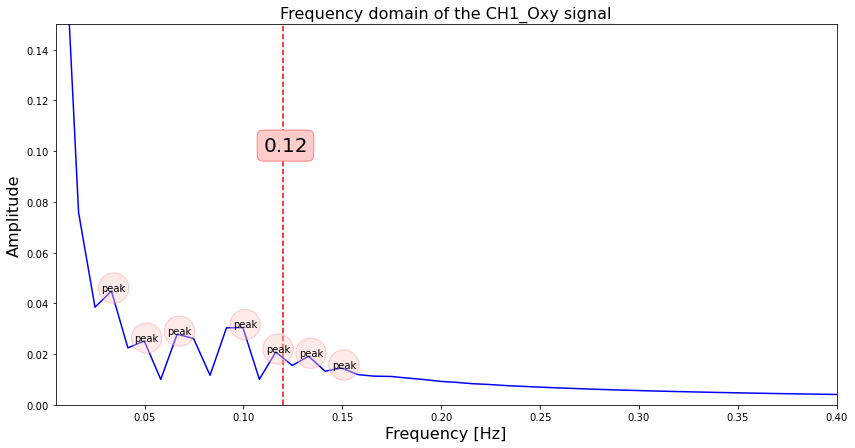

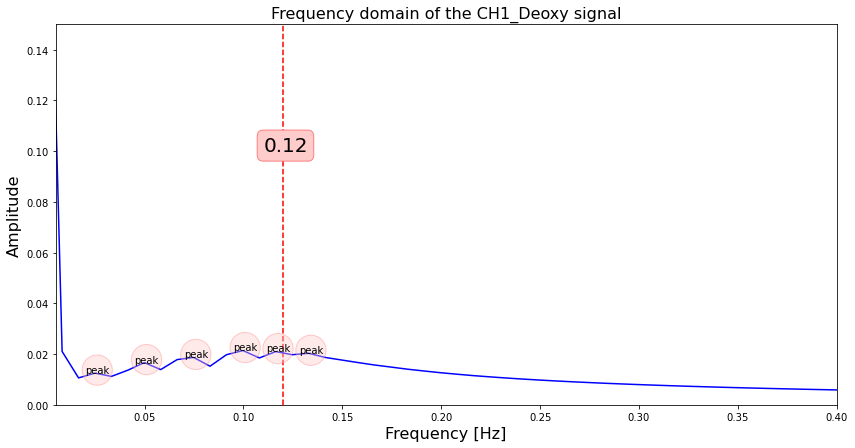

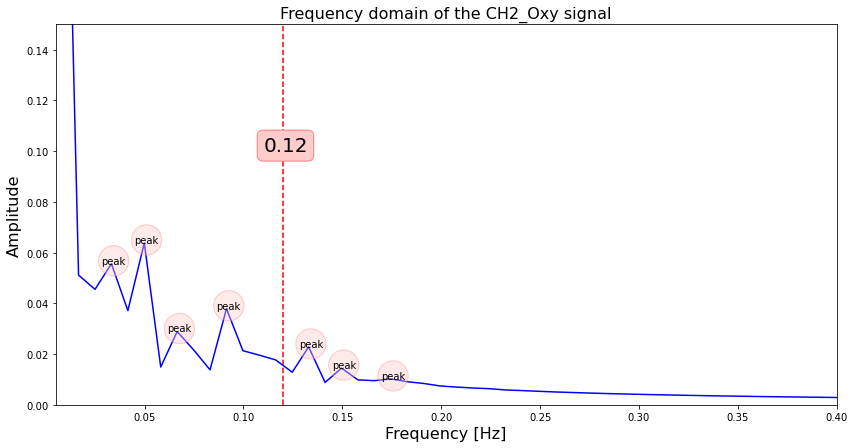

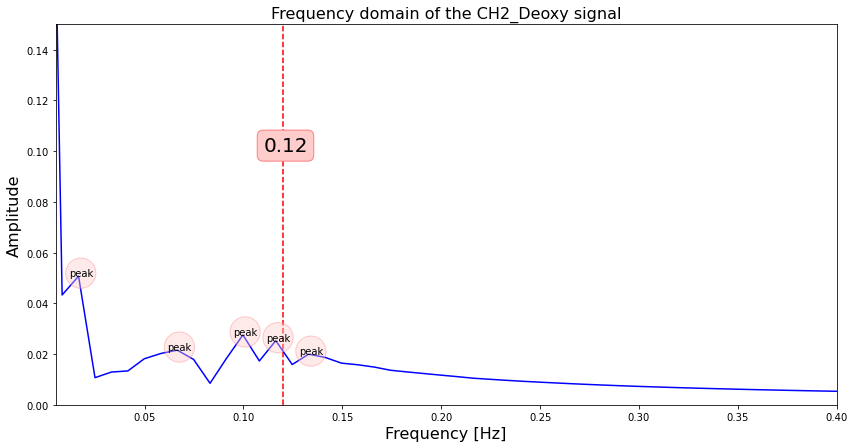

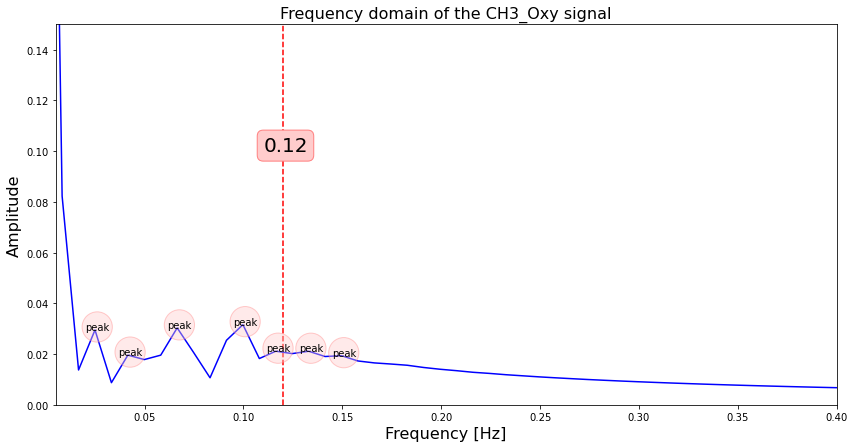

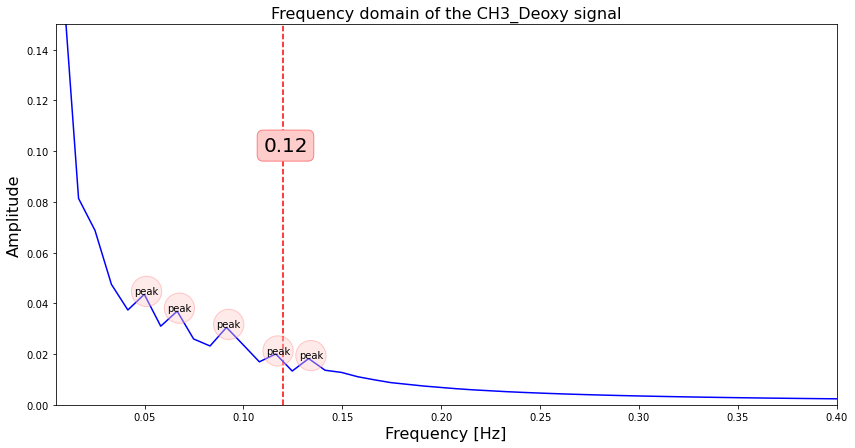

([0.0332409972299169,
  0.044833813080765124,
  0.0997229916897507,
  0.03045257630379095,
  0.0664819944598338,
  0.02783957218205183,
  0.0997229916897507,
  0.02139082333371449,
  0.11634349030470914,
  0.020981477382092627,
  0.1329639889196676,
  0.020308867685248186,
  0.04986149584487535,
  0.06380534836884746,
  0.0332409972299169,
  0.0555919763285512,
  0.09141274238227147,
  0.03786788571636979,
  0.01662049861495845,
  0.0506943796490901,
  0.0997229916897507,
  0.02753823570339262,
  0.11634349030470914,
  0.025289915961658298,
  0.0997229916897507,
  0.0315942499182408,
  0.0664819944598338,
  0.03031676382038568,
  0.024930747922437674,
  0.029501180123570014,
  0.04986149584487535,
  0.04353783382771209,
  0.0664819944598338,
  0.03690293779852197,
  0.09141274238227147,
  0.030505772876836777],
 ['CH1_Oxy First Freq',
  'CH1_Oxy First Amp',
  'CH1_Oxy Second Freq',
  'CH1_Oxy Second Amp',
  'CH1_Oxy Third Freq',
  'CH1_Oxy Third Amp',
  'CH1_Deoxy First Freq',
  'CH1_D

In [82]:
df = pd.read_csv(all_csv[5])
df = df.drop(columns= ['Unnamed: 0', 'Time_Arduino', 'easingdata'])
df = df.set_index('Time_Host')
FFT(df, plot= True)

# 顛倒ndarray  -> 帥

`fft_values[real_ind][::-1]`

# Numpy 神技

In [42]:
test= np.arange(1, 10)
test

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
test[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [44]:
test[::-2]

array([9, 7, 5, 3, 1])

In [45]:
test[::-3]

array([9, 6, 3])

In [46]:
test[::1]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
test[::2]

array([1, 3, 5, 7, 9])

In [48]:
test[::3]

array([1, 4, 7])